## ASX 200 ETF Comparison

The aim of this notebook is to analyse, compare and find the best ETF that tracks the top 200 ASX listed companies.

The ETFS that I will be analysing include:

* A200
* IOZ
* QOZ
* STW
* VAS


## A200

A200 aims to track the performance of the Solactive Australia 200 Index (before fees and expenses) comprising 200 of the largest companies by market capitalisation listed on the ASX.

Annual management fees is 0.07% p.a.

In [1]:
# import required packages
import pandas as pd
import numpy as np
import requests
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# create a ticker object for A200
A200 = yf.Ticker("a200.ax")
A200

yfinance.Ticker object <A200.AX>

In [3]:
# Download price data from yahoo finance
A200_historical = A200.history(period = "max")

In [4]:
A200_historical.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-05-07,100.353088,100.353088,100.353088,100.353088,0,0,0
2018-05-08,100.739998,100.769997,100.739998,100.739998,5064,0,0
2018-05-09,100.650002,100.839996,100.500000,100.769997,9577,0,0
2018-05-10,101.379997,101.379997,100.980003,101.010002,2498,0,0
2018-05-11,101.129997,101.269997,100.910004,100.910004,6466,0,0


In [5]:
def get_stock_price(symbol):
    """Retrieve the close prices for `symbol` representing stock
    """
    ticker = yf.Ticker(symbol)
    price = ticker.history(period = "max")
    return price["Close"] 

In [6]:
get_stock_price("a200.ax")

Date
2018-05-07    100.353088
2018-05-08    100.739998
2018-05-09    100.769997
2018-05-10    101.010002
2018-05-11    100.910004
                 ...    
2022-04-06    127.400002
2022-04-07    126.690002
2022-04-08    127.339996
2022-04-11    127.480003
2022-04-12    126.800003
Name: Close, Length: 1000, dtype: float64

In [71]:
def get_cum_returns(historical):
    """Calculate the cumulative returns we will use the cumprod() function"""
    market_returns = historical.pct_change().dropna()
    cum_returns = (market_returns + 1).cumprod()*100
    return cum_returns

In [72]:
get_cum_returns(get_stock_price("a200.ax"))

Date
2018-05-08    100.385548
2018-05-09    100.415441
2018-05-10    100.654602
2018-05-11    100.554956
2018-05-14    101.053197
                 ...    
2022-04-04    127.400163
2022-04-05    127.649291
2022-04-06    126.951750
2022-04-07    126.244249
2022-04-08    126.891956
Name: Close, Length: 997, dtype: float64

In [22]:
# Calculate percentage returns for each fund in separate columns (i.e., ((new/old) - 1)) using pandas df.pct_change()

marketReturns = A200_historical['Close'].pct_change().dropna()

In [48]:
# We can also find how the market would change day to day given these returns.
#If we were to start at 100 and multiply each day's returns we can find the path of the market over the
MV = 100
listMV = [MV]
for x in marketReturns:
    MV = MV*(1+x)
    listMV.append(MV)
print(listMV)

[100, 100.38554815911836, 100.41544138889482, 100.65460243220807, 100.55495579876961, 101.05319656851267, 100.60477531421343, 100.78414229542295, 100.49516173666588, 100.5549557987696, 100.73431517742831, 99.79762770004591, 99.83748787393145, 99.76773447026945, 99.63818700450373, 99.2495598123082, 99.48871325307064, 98.95061991199285, 99.39903356374128, 98.96057925355113, 99.55847425928346, 99.1897733527553, 99.56843360084174, 100.30583541389805, 99.95706079303726, 100.08660825880298, 99.36914033396484, 99.56843360084174, 100.78414229542295, 100.72435583587004, 101.12294997217467, 101.6411170275851, 103.23548597025274, 102.91661218171922, 102.74721214461877, 102.40840446786707, 102.45823158586171, 102.87675200783369, 103.02622575926677, 102.23900443076663, 102.6674917968477, 102.18918491532281, 102.82693249238987, 103.7636199697723, 103.95295389509093, 103.61415382089004, 102.9664392997139, 103.78355385799048, 103.54440041722805, 103.22551902614371, 102.6276316229622, 103.2454529143618

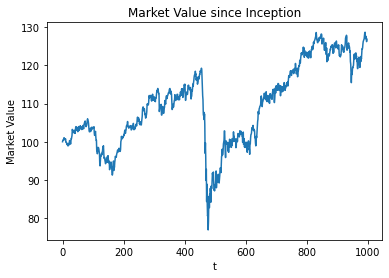

In [49]:
# And now let's graph the market value since inception.
# #Graphically it looks like this

plt.plot(range(len(listMV)),listMV)
plt.xlabel("t")
plt.ylabel("Market Value")
plt.title("Market Value since Inception")
plt.show()

In [50]:
# We could look at the return of the ETF since inception by dividing the last value by the first value.
#The realized market return since inception would equal 26.24%
yearReturn = listMV[-1]/listMV[0]-1
print(yearReturn)

0.26891955588938865


## Calculating the cumulative returns 

Plotting the daily and monthly returns are useful for understanding the daily and monthly volatility of the investment. To calculate the growth of our investment or in other word, calculating the total returns from our investment, we need to calculate the cumulative returns from that investment. To calculate the cumulative returns we will use the cumprod() function

In [65]:
#netflix_cum_returns = (netflix_daily_returns + 1).cumprod()


A200_cum_returns = (marketReturns + 1).cumprod()*100

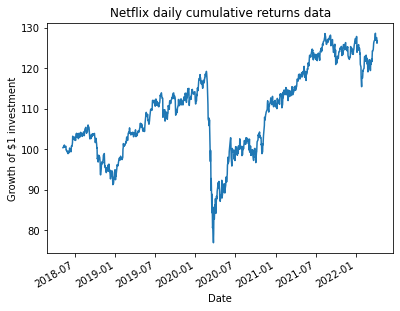

In [66]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
A200_cum_returns.plot()
ax1.set_xlabel("Date")
ax1.set_ylabel("Growth of $1 investment")
ax1.set_title("Netflix daily cumulative returns data")
plt.show()

In [41]:
A200_cum_returns

Date
2018-05-08    1.003855
2018-05-09    1.004154
2018-05-10    1.006546
2018-05-11    1.005550
2018-05-14    1.010532
                ...   
2022-04-04    1.274002
2022-04-05    1.276493
2022-04-06    1.269517
2022-04-07    1.262442
2022-04-08    1.268920
Name: Close, Length: 997, dtype: float64

## IOZ

The fund aims to provide investors with the performance of the S&P/ASX 200 Accumulation Index, before fees and expenses. The index is designed to measure the performance of the 200 largest Australian securities listed on the ASX.

Annual management fees is 0.09% p.a.

In [52]:
# create a ticker object for IOZ
ioz = yf.Ticker("ioz.ax")
ioz

yfinance.Ticker object <IOZ.AX>

In [53]:
# Download price data from yahoo finance
ioz_historical = ioz.history(period = "max")

In [54]:
ioz_historical

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-12-07,20.148741,20.148741,20.148741,20.148741,0,0,0
2010-12-08,20.030001,20.030001,20.030001,20.030001,0,0,0
2010-12-09,20.030001,20.180000,20.030001,20.180000,15427,0,0
2010-12-10,20.230000,20.230000,20.230000,20.230000,400,0,0
2010-12-13,20.230000,20.299999,20.209999,20.219999,60050,0,0
...,...,...,...,...,...,...,...
2022-04-04,31.219999,31.290001,31.180000,31.209999,779213,0,0
2022-04-05,31.309999,31.450001,31.200001,31.250000,703341,0,0
2022-04-06,31.010000,31.129999,30.870001,31.100000,437203,0,0


In [55]:
# Calculate percentage returns for each fund in separate columns (i.e., ((new/old) - 1)) using pandas df.pct_change()

ioz_Returns = ioz_historical['Close'].pct_change().dropna()

In [57]:
# We can also find how the market would change day to day given these returns.
#If we were to start at 100 and multiply each day's returns we can find the path of the market over the
MV = 10000
listMV = [MV]
for x in ioz_Returns:
    MV = MV*(1+x)
    listMV.append(MV)
print(listMV)

[10000, 9941.068236892927, 10015.514387277311, 10040.329455194053, 10035.366252283873, 10075.070928931156, 10094.92374057188, 10099.88694348206, 10099.88694348206, 10050.255861014417, 10089.960537661698, 10114.77560557844, 10174.333093866446, 10174.333093866446, 10094.92374057188, 10154.480282225722, 10154.480282225722, 10050.255861014415, 10000.624778546771, 9970.846507719849, 9950.993696079127, 9936.105033982747, 9936.105033982747, 9995.661575636592, 10149.518025949705, 10149.518025949705, 10099.886943482059, 10164.406688046083, 10253.742447161012, 10174.333093866446, 10075.070928931156, 10099.886943482059, 10174.333093866444, 10184.259499686805, 10109.81334930242, 10030.403049373692, 10099.886943482057, 10169.369890956263, 10214.037770513727, 10303.373529628656, 10313.299935449018, 10357.967815006481, 10402.634747929782, 10392.709288743583, 10357.96781500648, 10472.11864203815, 10472.11864203815, 10477.081844948329, 10491.970507044709, 10487.007304134528, 10412.561153750143, 10353.0

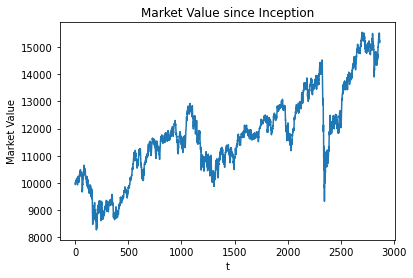

In [58]:
# And now let's graph the market value since inception.
# #Graphically it looks like this

plt.plot(range(len(listMV)),listMV)
plt.xlabel("t")
plt.ylabel("Market Value")
plt.title("Market Value since Inception")
plt.show()